In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import Purity_Measure as pm
from utils import Concurrence_Measure as con

In [10]:
def c_mems(P): # P --> Purity
    if P >= 5/9. and P<=1:
        cmems = 0.5*(1 + np.sqrt(2*P-1))
    elif P<5/9. and P>=1/3.:
        cmems = np.sqrt(2*P - 2/3.)
    else:
        cmems = 0

    return cmems

def c_w(P):
    if P >= 1/3. and P <= 1:
        cw = 0.5*(np.sqrt(12*P-3)-1)
    else:
        cw = 0
    return cw

In [11]:

purity = np.linspace(0, 1, 100000)

C_M = list(map(c_mems, purity))
C_M_array = np.array(C_M)

C_W = list(map(c_w, purity))
C_W_array = np.array(C_W)

(5000,)
(1750, 4, 4)
(5000,)


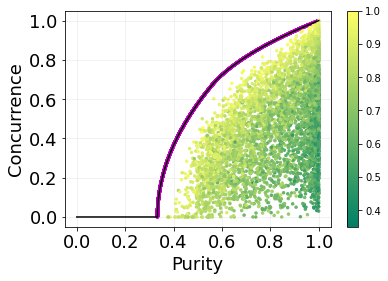

(6750,)


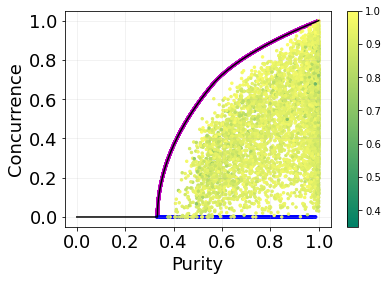

In [12]:

fidelity_list_valid, fidelity_av_valid, dms_valid, pur_list_valid, params_list_valid, ent_list_valid = pd.read_pickle(
    "./test_prediction_results_data_driven/fidelity_list_fid_av_pred_dm_params_alpha_MEMS_k_params_[[0.0, 1.0]]_qs_2_separability_mix_MA.pickle")

fids_valid = np.array(fidelity_list_valid).reshape(-1, 10, 5000)
fids_mean_valid = fids_valid.mean(axis=1)
fids_std_valid = fids_valid.std(axis=1)

print(fids_mean_valid[0].shape)

# Test sets
tomo_test_data_file = '../../Distributions/Simulation/MA_train_MA_test/data/MA_tomo_tau_dm_30000_qs_2_alpha_TEST_0.1.pickle'
x_test, tau, dm_mle_uncorrected = pd.read_pickle(tomo_test_data_file)
pur_test = pm.purity(dm_mle_uncorrected)
con_test = con.concurrence(dm_mle_uncorrected)


# Training sets
_,_,dm_train = pd.read_pickle('../MEMS/data/Pool_MEMS_qs_2_tomo_tau_dm_35000_mems_only.pickle')

# Added sep. states
_,_,dm_sep = pd.read_pickle('../MEMS/data/MEMS_qs_2_tomo_tau_dm_test_n_20000_TEST_to_be_mixed.pickle')

print(dm_sep[:1750].shape)
fs = 18
for j in [0, -1]:
    sep_add = 0
    if j == 0:
        dm_train = dm_train[:5000]
        pass
    else:
        sep_add = 1750
        dm_train = np.concatenate((dm_train[:5000], dm_sep[:1750]))

    pur_train = pm.purity(dm_train)
    print(pur_train.shape)
    con_train = con.concurrence(dm_train)

    plt.plot(purity,C_M_array, 'k-', alpha=1)
    # plt.plot(purity,C_W_array, 'k-')
    plt.scatter(pur_train[:5000], con_train[:5000],  c=np.repeat('m', len(pur_train[:5000])), s = 6)
    if len(pur_train) > 5000:
        plt.scatter(pur_train[5000:], con_train[5000:],  c=np.repeat('b', len(pur_train[5000:])), s = 6, label='Separable States' )
        # plt.legend()
    plt.scatter(pur_test, con_test, vmin=0.35, vmax=1., c=fids_mean_valid[j], cmap='summer', s= 6)
    plt.xlabel('Purity', fontsize=fs)
    plt.ylabel('Concurrence', fontsize=fs)
    plt.xticks(fontsize=fs)
    plt.yticks(fontsize=fs)
    plt.colorbar()
    plt.grid(alpha=0.2)
    plt.subplots_adjust(bottom=0.13,left=0.13)
    # plt.savefig(f'MEMScp_{j}.svg')
    # plt.savefig(f'MEMScp_{j}.png')

    # # for zoomed in
    # plt.axis([0.508, 0.512, 0.587, 0.597])
    # plt.savefig('Zoomed_IN_MEMS.svg')
    # plt.savefig('Zoomed_IN_MEMS.png')

    plt.show()